# Sales Forecasting
Develop time series forecasting models to predict future product prices

## Background and Business Problem
For companies to become competitive and skyrocket their sales, they need to leverage AI and machine learning to develop predictive models so they can forecast sales in the future. Predictive models attempt at forecasting future sales based on historical data while taking into account: 
- seasonality effects,
- demand,
- holidays,
- promotions,
- and competition. 

## Case Study
In this project, you work as a data scientist in the sales department, and the sales team provide you with data from 1100 stores. The objective is to predict future daily sales based on some features such as:
- store promotions,
- store size,
- school and state holidays,
- distance away from competition,
- types of the products.

## Load the Dataset
- Data Source: https://www.kaggle.com/c/rossmann-store-sales/data

In [30]:
# import all the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

# Display all the columns in pandas without being truncated
pd.options.display.max_columns = None

### Sales Training Data

In [3]:
sales_train_df = pd.read_csv('Datasets/train.csv')
sales_train_df

C:\Users\Diardano Raihan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


The followings are the column descriptions for the dataset:
- `Id`: transaction id (combination of store and date)
- `Store`: unique store id
- `Sales`: sales/day, this is the target variable (in Euro, not US dollar)
- `Customer`: number of customers on a given day
- `Open`: Boolean to say whether a store is open (1) or closed (0)
- `Promo`: describes if a store is running a promo on that day or not
- `StateHoliday`: indicate which state holiday ( a = public holiday, b = easte holiday, c = christmas, 0 = None)
- `SchoolHoliday`: indicate if the (store, date) was affected by the closure of public school
- `StoreType`: categorical variable to indicate type of store (a, b, c, d)
- `Assortment`: a = basic, b = extra, c = extended
- `CompetitionDistance`(meter): distance to closest competitor
- `CompetitionOpenSince`(Month/Year): date when competition was open
- `Promo2`: Promo2 is a continuing and consecutive promotion for some stores (1 = store is participatin, 0 = store is not participating)
- `Promo2Since`(Year/Weak): date when store started participating in Promo2
- `PromoInterval`: describes the consecutive intervals Promo2 is started, naming the months promotion is started anew (i.e. "Feb, May, Aug, Nov" means each round starts in February, May, August, and November of any given year for that store)

In [4]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


You will find that:
- the average of sales is around ~ € 5700 per day.
- the mean of customers is around ~ 600, with the minimum is 0 (when the store was closed), and the maximum is 7000.

In the end, we need to make sure that the data actually makes sense. We just gathered data from thousands of stores, the thought of how much the store makes per day, and so on are really essential to get the idea of what's actually happening.

That's why I'm passionate about AI and machine learning because you can get to know and understand the actual numbers associated with your brands or companies.

### Store Information Data

In [6]:
store_info_data = pd.read_csv('Datasets/store.csv')
store_info_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
store_info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
store_info_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In short, the average on the competition distance is around 5404 meters away (5.4 kms).

# Exploratory Data Analysis
## Explore the Sales Training Data 

### Missing Data

<AxesSubplot:>

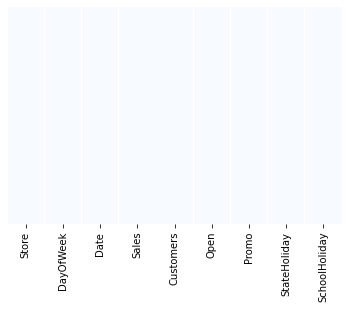

In [9]:
# Let's see if we have any missing data
sns.heatmap( sales_train_df.isnull(), yticklabels=False, cbar=False, cmap = 'Blues')

### Histogram

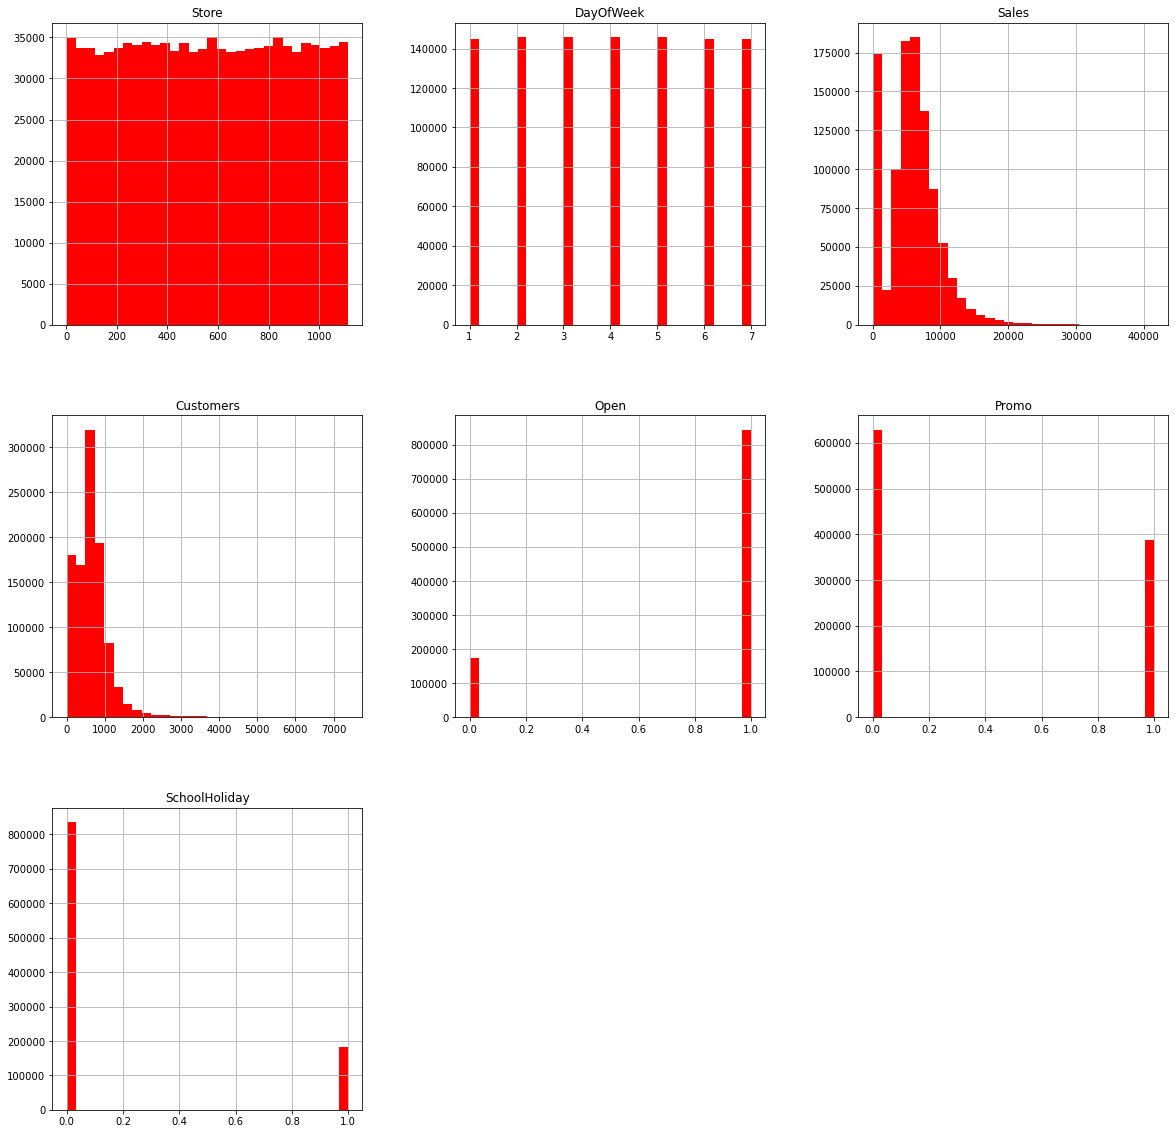

In [10]:
sales_train_df.hist( bins=30, color='r', figsize=(20,20))
plt.show()

__Summary__:
- The average of customers is 600 per day, with the maximum is 4500 (note that we cannot see the maximum number of customers, which is 7388, since it is the outlier).
- Data is equally distributed across various  Days of the week (~150000 observations x 7 day = ~ 1.1 million observations, basically all the data we have)
- Stores are open ~ 80% of the time
- Promo #1 was running ~40% of the time
- The average sales around 5000-6000 Euros
- School holidays are around ~18% of the time

In [11]:
# Let's see how many stores are open and closed!
closed_train_df = sales_train_df[sales_train_df.Open == 0].reset_index()
open_train_df = sales_train_df[sales_train_df.Open == 1].reset_index()

print("Total: ", len(sales_train_df))
print("Number of closed store:", len(closed_train_df))
print("Number of open store:", len(open_train_df))

Total:  1017209
Number of closed store: 172817
Number of open store: 844392


Now, let's keep the open stores only, since the closed ones will give us almost zero information (no customer, promotions, etc).

In [12]:
sales_train_df = open_train_df

Then, since the updated data consists of open stores only, we can safely drop the `Open` column in the dataframe.

In [13]:
sales_train_df.drop(columns='Open', axis=1, inplace=True)

In [14]:
sales_train_df

,index,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,0,1,5,2015-07-31,5263,555,1,0,1
1,1,2,5,2015-07-31,6064,625,1,0,1
2,2,3,5,2015-07-31,8314,821,1,0,1
3,3,4,5,2015-07-31,13995,1498,1,0,1
4,4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...,...
844387,1016776,682,2,2013-01-01,3375,566,0,a,1
844388,1016827,733,2,2013-01-01,10765,2377,0,a,1
844389,1016863,769,2,2013-01-01,5035,1248,0,a,1
844390,1017042,948,2,2013-01-01,4491,1039,0,a,1


In [15]:
sales_train_df.describe()

,index,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,8.443920e+05,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,5.086146e+05,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,2.936967e+05,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.560198e+05,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,5.101435e+05,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,7.630212e+05,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1.017190e+06,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


__Insight__:
- The average sales for open stores is around ~7000 euros.
- The average number of customers is around ~ 763 __(went up)__.

## Explore the Stores Information Data

### Missing Data

<AxesSubplot:>

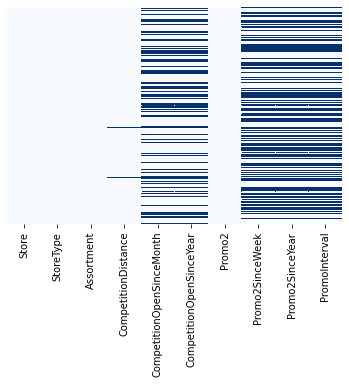

In [16]:
sns.heatmap( store_info_data.isnull(), yticklabels=False, cbar=False, cmap='Blues')

It seems that we have tons of missing data / information. In `CompetitionDistance`, we only miss a couple of points, so we can easily deal with them. However, in the `CompetitionOpenSinceMonth`, `ComptitionOpenSinceYear`, `Promo2SinceWeek`, `Promo2SinceYear`, and `PromoInterval`, we need to perform special method to handle the missing information.

In [17]:
# Let's take a look at the CompetitionDistance feature
store_info_data[store_info_data.CompetitionDistance.isnull()]

# Only 3 rows are missing

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [18]:
# Let's take a look at the CompetitionOpenSinceMonth feature
store_info_data[store_info_data.CompetitionOpenSinceMonth.isnull()]

# many rows are missing = 354 (almost one third of the 1115 stores)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


- Notice that when `promo2` is 0, then all the related columns (`promo2SinceWeek`, `Promo2SinceYear`, and `PromoInterval`) are set to __NaN__ (Not a Number). 
- There are 354 rows where `CompetitionOpenSinceYear` and `CoompetitionOpenSinceMonth` is missing.

Hence, let's set these values to zeros.

In [20]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for col in str_cols:
    store_info_data[col].fillna(0, inplace = True)

<AxesSubplot:>

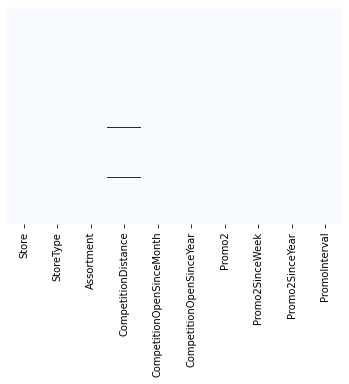

In [21]:
sns.heatmap( store_info_data.isnull(), yticklabels=False, cbar=False, cmap='Blues')

- There are 3 rows with `CompetitionDistance` values missing, let's fill them up with with average values of the `CompetitionDistance` column

In [37]:
store_info_data['CompetitionDistance'].fillna(store_info_data.CompetitionDistance.mean(), 
                                              inplace = True)
store_info_data.CompetitionDistance.isnull().value_counts()

False    1115
Name: CompetitionDistance, dtype: int64

<AxesSubplot:>

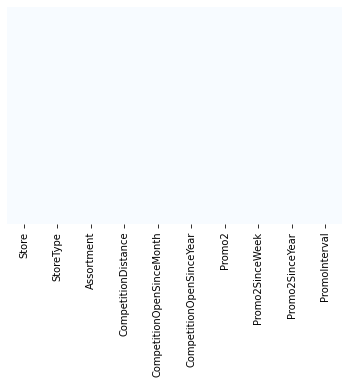

In [38]:
sns.heatmap(store_info_data.isna(), yticklabels= False, cbar=False, cmap='Blues')

### Histogram

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

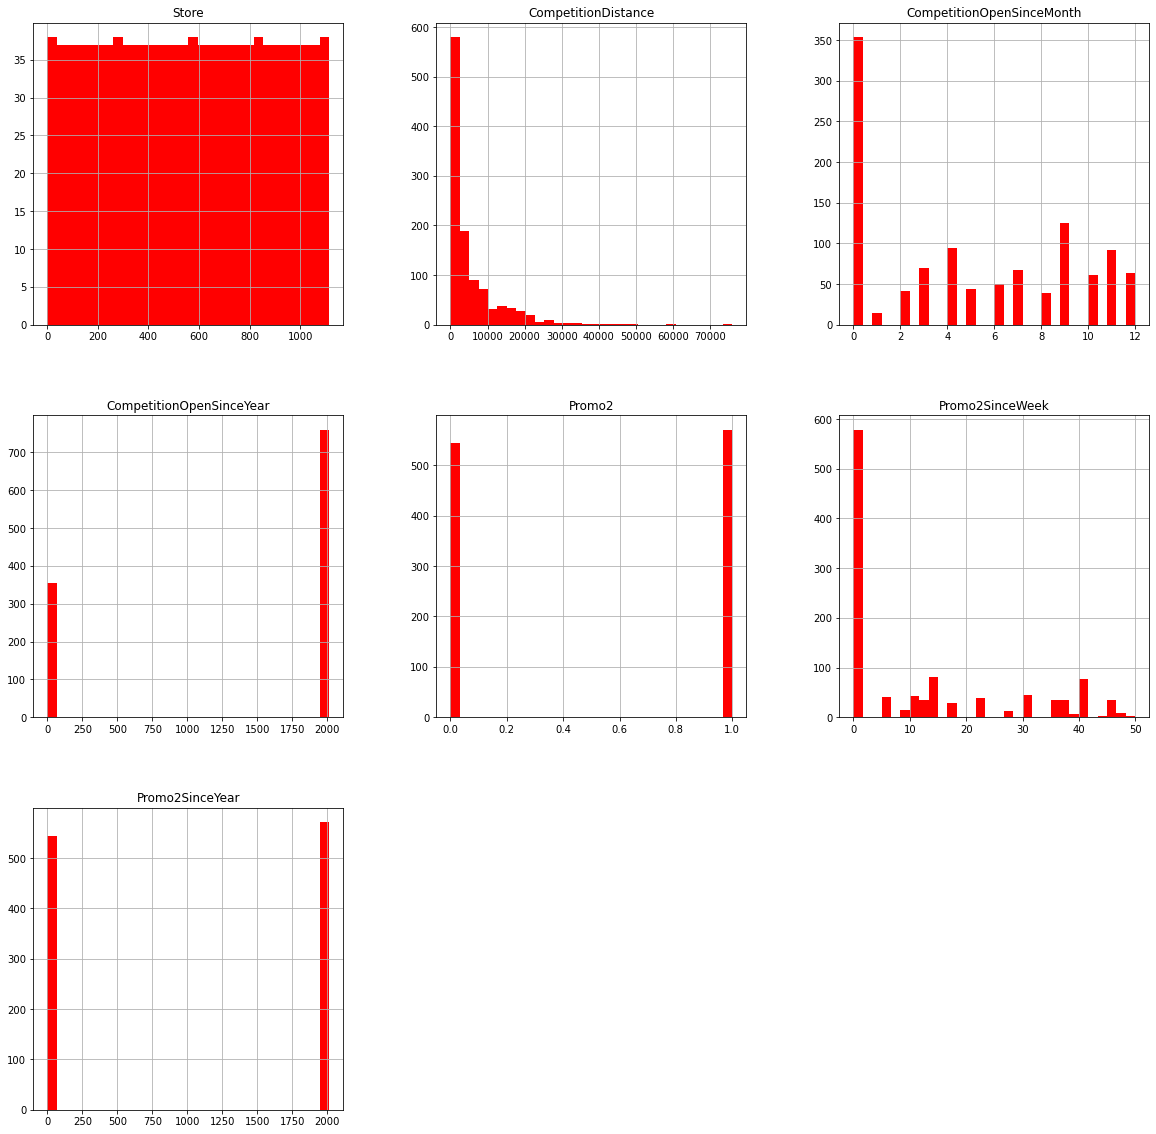

In [40]:
store_info_data.hist( bins=30, figsize=(20,20), color ='r')

- Half of the stores are involved in promo2
- Half of the stores have their competition at a distance of 0-3000m (3kms away)